In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



## Preprocessing

In [2]:
# Load the CSV file
file_path = "EGX30_2000-2025.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())


       Date      Price       Open       High        Low     Vol. Change %
0  2/6/2025  30,011.84  29,735.59  30,011.84  29,735.59   83.50M    0.93%
1  2/5/2025  29,735.59  29,668.47  29,772.63  29,596.50  103.71M    0.23%
2  2/4/2025  29,668.47  29,754.77  29,937.39  29,668.47  135.05M   -0.29%
3  2/3/2025  29,754.77  29,917.96  30,001.23  29,698.79  152.06M   -0.55%
4  2/2/2025  29,917.96  30,010.62  30,198.22  29,917.96  103.16M   -0.31%


**Date:** The trading date of the EGX30 index (formatted as MM/DD/YYYY).

**Price:** The closing price of the EGX30 index on that particular day.

**Open:** The opening price of the EGX30 index at the start of the trading session.

**High:** The highest price the EGX30 index reached during the trading session.

**Low:** The lowest price the EGX30 index reached during the trading session.

**Vol. (Volume):** The total number of shares traded during that day.

**Change %:** The percentage change in the EGX30 index compared to the previous trading day's closing price.

In [3]:
# # Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])


In [4]:
print(df.head())


        Date      Price       Open       High        Low     Vol. Change %
0 2025-02-06  30,011.84  29,735.59  30,011.84  29,735.59   83.50M    0.93%
1 2025-02-05  29,735.59  29,668.47  29,772.63  29,596.50  103.71M    0.23%
2 2025-02-04  29,668.47  29,754.77  29,937.39  29,668.47  135.05M   -0.29%
3 2025-02-03  29,754.77  29,917.96  30,001.23  29,698.79  152.06M   -0.55%
4 2025-02-02  29,917.96  30,010.62  30,198.22  29,917.96  103.16M   -0.31%


In [5]:
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6106 entries, 0 to 6105
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      6106 non-null   datetime64[ns]
 1   Price     6106 non-null   object        
 2   Open      6106 non-null   object        
 3   High      6106 non-null   object        
 4   Low       6106 non-null   object        
 5   Vol.      3906 non-null   object        
 6   Change %  6106 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 334.0+ KB
None


In [6]:
print(df.describe())

                                Date
count                           6106
mean   2012-07-24 03:15:30.363576832
min              2000-02-06 00:00:00
25%              2006-04-06 18:00:00
50%              2012-07-29 12:00:00
75%              2018-10-29 18:00:00
max              2025-02-06 00:00:00


In [7]:
# Convert numerical columns by removing commas and converting to float
cols_to_convert = ['Price', 'Open', 'High', 'Low']
df[cols_to_convert] = df[cols_to_convert].replace(',', '', regex=True).astype(float)

In [8]:
# Convert Change % column (remove '%' and convert to decimal)
df['Change %'] = df['Change %'].str.replace('%', '', regex=True).astype(float) / 100

In [9]:

def convert_vol(value):
    if isinstance(value, str):  # Ensure value is a string
        if 'M' in value:
            return float(value.replace('M', '')) * 1_000_000
        elif 'B' in value:
            return float(value.replace('B', '')) * 1_000_000_000
        else:
            return float(value)  # Convert numbers stored as strings
    return value  # Return original if already float or NaN

df['Vol.'] = df['Vol.'].apply(convert_vol)



In [10]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2025-02-06,30011.84,29735.59,30011.84,29735.59,83500000.0,0.0093
1,2025-02-05,29735.59,29668.47,29772.63,29596.50,103710000.0,0.0023
2,2025-02-04,29668.47,29754.77,29937.39,29668.47,135050000.0,-0.0029
3,2025-02-03,29754.77,29917.96,30001.23,29698.79,152060000.0,-0.0055
4,2025-02-02,29917.96,30010.62,30198.22,29917.96,103160000.0,-0.0031


In [11]:
# Check how many missing values exist in the Volume column initially.
initial_missing = df['Vol.'].isnull().sum()
print("\nMissing 'Vol.' values before imputation:", initial_missing)


Missing 'Vol.' values before imputation: 2200


In [12]:
print(df.isnull().sum())

Date           0
Price          0
Open           0
High           0
Low            0
Vol.        2200
Change %       0
dtype: int64


In [13]:
df.dropna(inplace=True)

In [14]:
print(df.isnull().sum())

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


In [15]:
print(df.dtypes)

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.               float64
Change %           float64
dtype: object


In [16]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2025-02-06,30011.84,29735.59,30011.84,29735.59,83500000.0,0.0093
1,2025-02-05,29735.59,29668.47,29772.63,29596.50,103710000.0,0.0023
2,2025-02-04,29668.47,29754.77,29937.39,29668.47,135050000.0,-0.0029
3,2025-02-03,29754.77,29917.96,30001.23,29698.79,152060000.0,-0.0055
4,2025-02-02,29917.96,30010.62,30198.22,29917.96,103160000.0,-0.0031
...,...,...,...,...,...,...,...
3928,2008-12-03,3979.71,4014.26,4085.91,3979.71,40440000.0,0.0107
3929,2008-12-02,3937.66,3886.00,3937.66,3829.44,35650000.0,-0.0211
3930,2008-12-01,4022.58,4185.59,4185.59,4022.58,36480000.0,-0.0436
3931,2008-11-30,4205.86,4100.29,4228.08,4100.29,43360000.0,0.0401


Detect Outliers

In [17]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25%)
    Q3 = df[column].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers in the "Price" column
outliers_price = detect_outliers_iqr(df, 'Price')
print("Outliers in Price column:\n", outliers_price)

# Detect outliers in Volume column
outliers_vol = detect_outliers_iqr(df, 'Vol.')
print("Outliers in Volume column:\n", outliers_vol)

Outliers in Price column:
           Date     Price      Open      High       Low         Vol.  Change %
0   2025-02-06  30011.84  29735.59  30011.84  29735.59   83500000.0    0.0093
1   2025-02-05  29735.59  29668.47  29772.63  29596.50  103710000.0    0.0023
2   2025-02-04  29668.47  29754.77  29937.39  29668.47  135050000.0   -0.0029
3   2025-02-03  29754.77  29917.96  30001.23  29698.79  152060000.0   -0.0055
4   2025-02-02  29917.96  30010.62  30198.22  29917.96  103160000.0   -0.0031
..         ...       ...       ...       ...       ...          ...       ...
293 2023-11-23  25519.49  25029.57  25563.41  25029.57  329530000.0    0.0196
294 2023-11-22  25029.57  24774.04  25098.40  24774.04  227890000.0    0.0103
295 2023-11-21  24774.04  24760.02  24774.04  24517.90  216010000.0    0.0006
296 2023-11-20  24760.02  24899.59  25337.90  24726.00  242590000.0   -0.0056
297 2023-11-19  24899.59  24383.27  24958.79  24383.27  270690000.0    0.0212

[282 rows x 7 columns]
Outliers in V

In [18]:
# Calculate Q1, Q3, and IQR
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]
print("Outliers detected using IQR:")
print(outliers_iqr)

Outliers detected using IQR:
          Date     Price      Open      High       Low         Vol.  Change %
0   2025-02-06  30011.84  29735.59  30011.84  29735.59   83500000.0    0.0093
1   2025-02-05  29735.59  29668.47  29772.63  29596.50  103710000.0    0.0023
2   2025-02-04  29668.47  29754.77  29937.39  29668.47  135050000.0   -0.0029
3   2025-02-03  29754.77  29917.96  30001.23  29698.79  152060000.0   -0.0055
4   2025-02-02  29917.96  30010.62  30198.22  29917.96  103160000.0   -0.0031
..         ...       ...       ...       ...       ...          ...       ...
293 2023-11-23  25519.49  25029.57  25563.41  25029.57  329530000.0    0.0196
294 2023-11-22  25029.57  24774.04  25098.40  24774.04  227890000.0    0.0103
295 2023-11-21  24774.04  24760.02  24774.04  24517.90  216010000.0    0.0006
296 2023-11-20  24760.02  24899.59  25337.90  24726.00  242590000.0   -0.0056
297 2023-11-19  24899.59  24383.27  24958.79  24383.27  270690000.0    0.0212

[282 rows x 7 columns]


In [19]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]  # Keep only in-range values

# Remove outliers from "Vol."
data_cleaned = remove_outliers_iqr(df, 'Vol.')

# Print before & after removing outliers
print(f"Original data shape: {df.shape}")
print(f"Cleaned data shape: {data_cleaned.shape}")

# Save the cleaned dataset (optional)
data_cleaned.to_csv("cleaned_dataset.csv", index=False)


Original data shape: (3906, 7)
Cleaned data shape: (3722, 7)


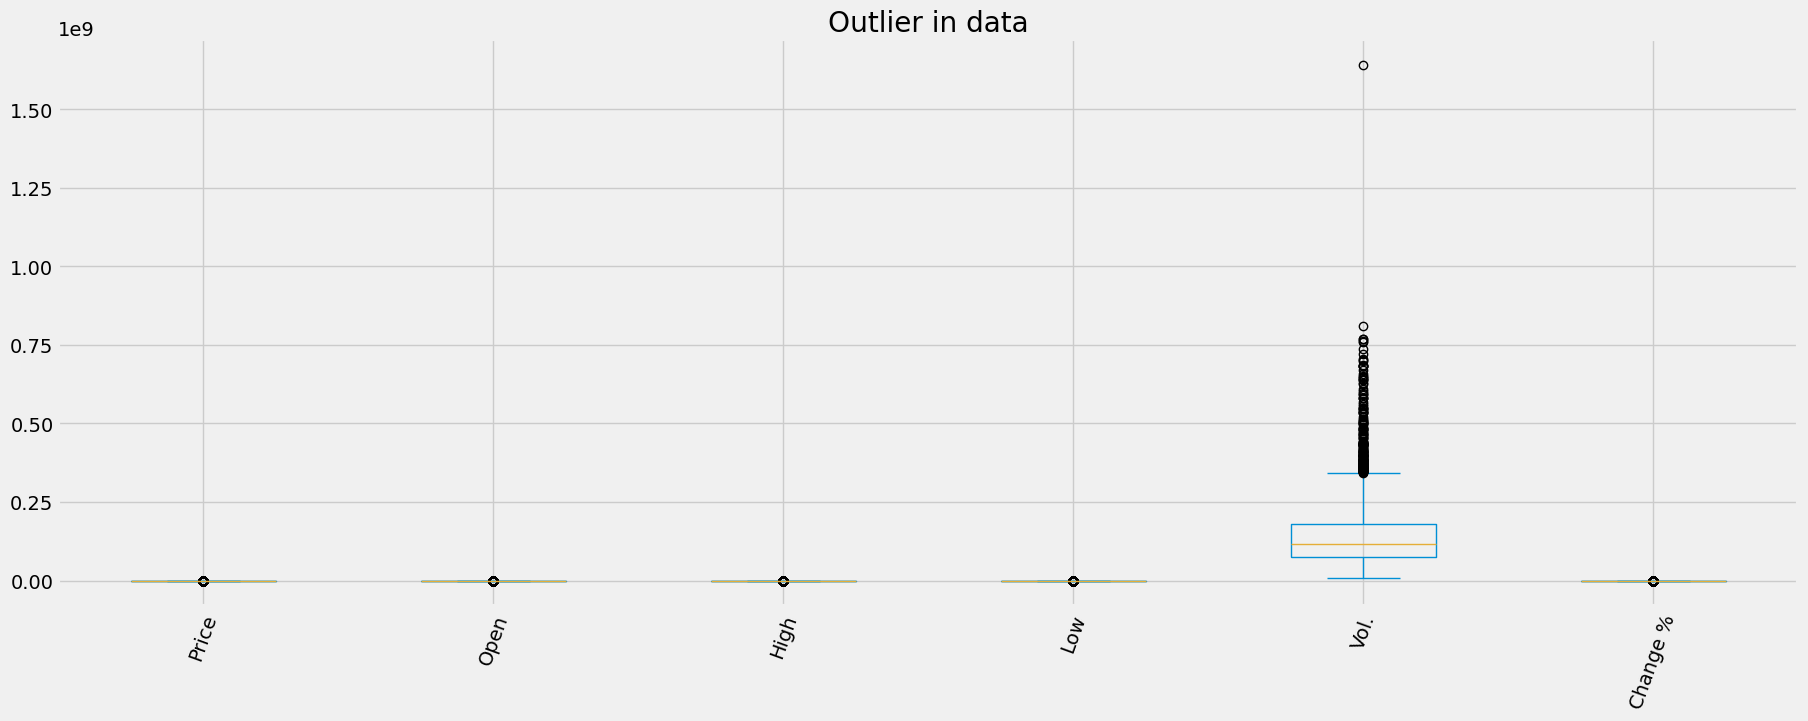

In [20]:
import matplotlib.pyplot as plt
# outlier
plt.style.use('fivethirtyeight')
outlier= df.plot(kind='box',figsize=(20,7));
plt.xticks(rotation=70);
plt.title('Outlier in data');


In [21]:
# import pandas as pd
# from scipy.stats import zscore

# # Calculate Z-scores for the 'Price' column
# df['Z-Score'] = zscore(df['Vol.'])

# # Identify outliers (Z-Score > 3 or Z-Score < -3)
# outliers_zscore = df[(df['Z-Score'] > 3) | (df['Z-Score'] < -3)]
# print("Outliers detected using Z-Score:")
# print(outliers_zscore)

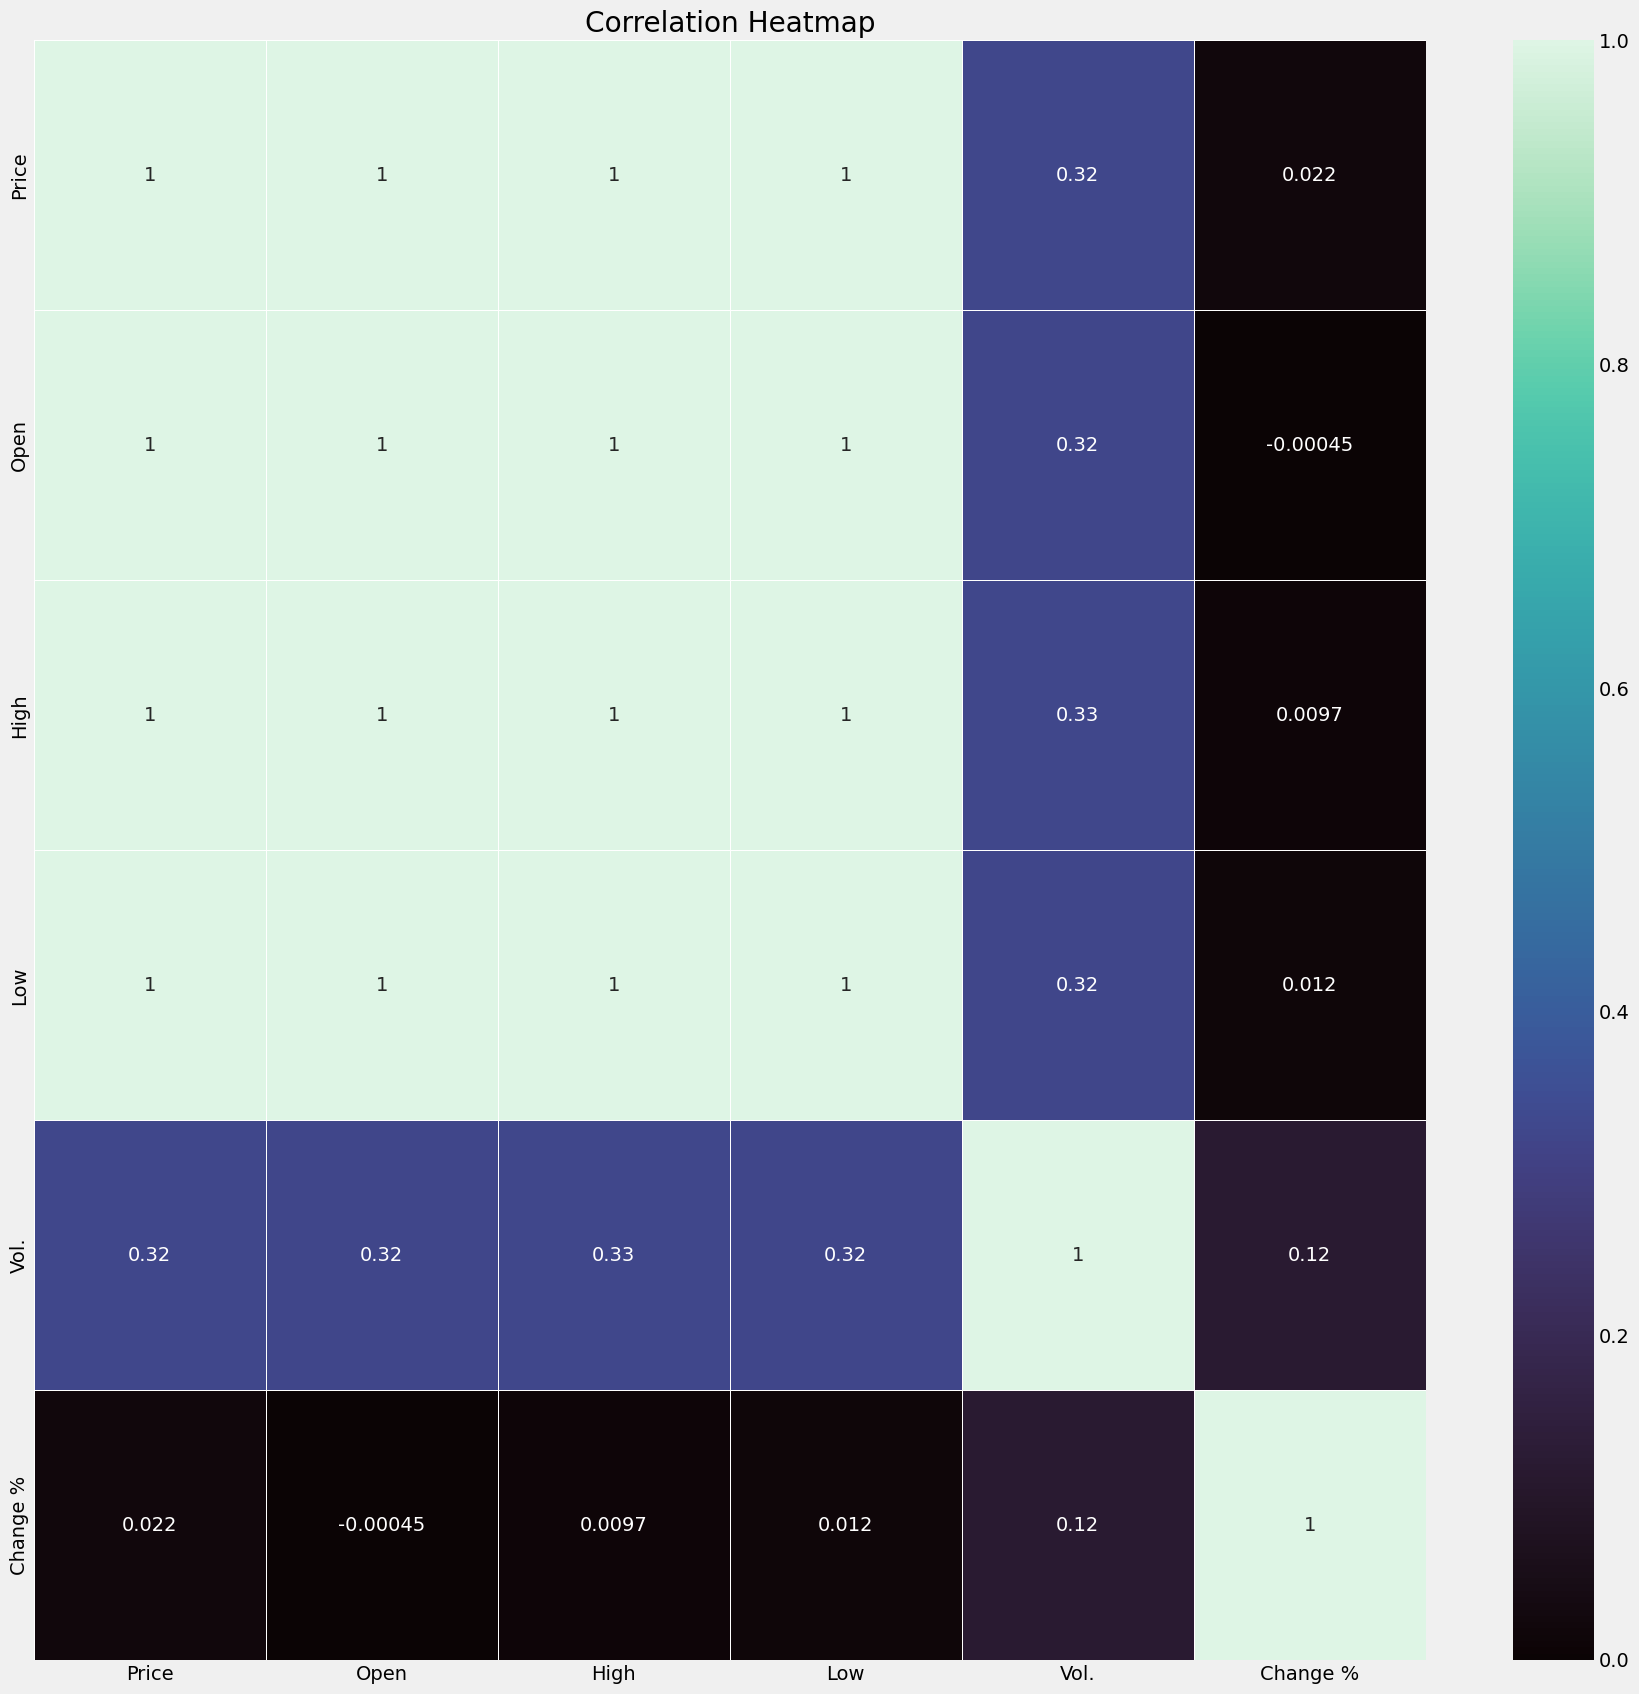

In [22]:
import seaborn as sns
numerical_features= df.select_dtypes(include=['int64', 'float64']).copy()
plt.figure(figsize=(20,20))
Correlation_df = df.select_dtypes(include=['int64', 'float64','bool']).copy()
sns.heatmap(Correlation_df.corr(), annot= True, linewidths= 0.5,cmap='mako')
plt.title('Correlation Heatmap')
plt.show()

## Normalize Data

In [23]:
from sklearn.preprocessing import MinMaxScaler
# LSTMs work better with scaled data, so apply MinMax scaling.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Price', 'Open', 'High', 'Low', 'Vol.']])

# Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=['Price', 'Open', 'High', 'Low', 'Vol.'])
scaled_df['Date'] = df['Date'].values  # Keep the Date column


In [24]:
# We'll use a sequence of past n days (e.g., 60) to predict the next day's price.
import numpy as np

def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 0])  # Predicting 'Price' column
    return np.array(X), np.array(y)

# Convert DataFrame to NumPy array (excluding Date column)
scaled_values = scaled_df.drop(columns=['Date']).values

# Define sequence length
seq_length = 60

# Split data into training (80%) and testing (20%)
train_size = int(len(scaled_values) * 0.8)
train_data, test_data = scaled_values[:train_size], scaled_values[train_size:]

# Create sequences
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)


## Create Training & Testing Data

In [25]:
import numpy as np

def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 0])  # Predicting 'Price' column
    return np.array(X), np.array(y)

# Convert DataFrame to NumPy array (excluding Date column)
scaled_values = scaled_df.drop(columns=['Date']).values

# Define sequence length
seq_length = 60

# Split data into training (80%) and testing (20%)
train_size = int(len(scaled_values) * 0.8)
train_data, test_data = scaled_values[:train_size], scaled_values[train_size:]

# Create sequences
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)


## Build the ARIMA Model

In [27]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load your stock price dataset (Assuming it's already preprocessed)
# data = pd.read_csv("stock_prices.csv")

# Extracting the 'Price' column as our target variable (assuming it's the first column)
prices = df['Price'].values

# Normalize the data
scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices.reshape(-1, 1)).flatten()

# Splitting the dataset into train and test sets
train_size = int(len(prices_scaled) * 0.8)
train, test = prices_scaled[:train_size], prices_scaled[train_size:]

# Reshape data for CNN input
seq_length = 5
X_train, y_train, X_test, y_test = [], [], [], []
for i in range(seq_length, len(train)):
    X_train.append(train[i-seq_length:i])
    y_train.append(train[i])
for i in range(seq_length, len(test)):
    X_test.append(test[i-seq_length:i])
    y_test.append(test[i])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, 1)),
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Predicting 'Price'
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
)

# Make predictions
predictions = model.predict(X_test)

# Reverse scaling
predicted_prices = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Evaluate the model
mae = mean_absolute_error(actual_prices, predicted_prices)
mse = mean_squared_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

# Function to predict future stock prices using CNN
def predict_future_cnn(n_days, model, last_data):
    future_predictions = []
    last_seq = last_data[-seq_length:].reshape(1, seq_length, 1)
    
    for _ in range(n_days):
        predicted_price = model.predict(last_seq)[0, 0]
        future_predictions.append(predicted_price)
        last_seq = np.roll(last_seq, -1)
        last_seq[0, -1, 0] = predicted_price
    
    forecast_actual = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()
    return forecast_actual

# Predict future stock prices for 7 days
future_prices = predict_future_cnn(7, model, prices_scaled)
print("Future Prices:", future_prices)


Epoch 1/50


c:\Users\ziadh\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0323 - val_loss: 3.2276e-04
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0041 - val_loss: 9.4265e-05
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0040 - val_loss: 1.3892e-04
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0036 - val_loss: 2.9119e-04
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0030 - val_loss: 3.6194e-04
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0025 - val_loss: 3.8978e-04
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0025 - val_loss: 4.6554e-04
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0025 - val_loss: 3.4420e-04
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022 - val_loss: 5.4424e-04
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0024 - val_loss: 2.8358e-04
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019 - val_loss: 3.3004e-04
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s

In [28]:
# Evaluate the ARIMA model
mae = mean_absolute_error(actual_prices, predicted_prices)
mse = mean_squared_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 209.95
MSE: 84800.35
RMSE: 291.20
